# 'Python Data Science Handbook' kitabından çoğrafya üzerinden hatrita üzerinden veri görselleştirme işlemi yaptım

Proje Özeti
Bu projede, Basemap kütüphanesini kullanarak şehir verilerini harita üzerinde görselleştirdim. Amacım, şehirlerin nüfuslarını ve alanlarını harita üzerinde göstererek, bu şehirlerin coğrafi dağılımlarını ve büyüklüklerini anlamak oldu. Gaziantep gibi belirli şehirleri işaretleyerek, veri görselleştirme süreçlerinde harita tabanlı analizlerin nasıl gerçekleştirilebileceğini ortaya koymak istedim.

Kullanılan Araçlar ve Teknolojiler
Matplotlib: Python için güçlü bir veri görselleştirme kütüphanesi. Harita çizimi ve veri noktalarını görselleştirmede kullanıldı.
Basemap: Matplotlib ile birlikte kullanılan bir harita kütüphanesi. Bu proje kapsamında şehir verilerini coğrafi harita üzerinde gösterme amacıyla kullanıldı.
Proje Adımları
Harita Arka Planının Oluşturulması:
Harita üzerinde şehir verilerini görselleştirmek için uygun bir arka plan haritası oluşturuldu. Basemap kütüphanesinin lcc (Lambert Conformal Conic) projeksiyonu kullanılarak, yüksek çözünürlükte bir harita yapıldı.

Şehir Verilerinin Dağıtılması:
Şehirlerin koordinatları, nüfusları ve alanları kullanılarak harita üzerinde işaretlendi. Nüfus verileri log10 dönüşümü ile renk yoğunluğuna dönüştürüldü ve alan büyüklüğü, veri noktalarının boyutunu temsil etti.

Renkli Çubuk ve Legend Oluşturulması:
Nüfus verilerinin görsel temsilini kolaylaştırmak için bir renkli çubuk (colorbar) eklendi. Ayrıca, veri noktalarının alanını temsil eden bir legend oluşturuldu.

Belirli Şehirlerin İşaretlenmesi:
Gaziantep gibi belirli şehirler harita üzerinde işaretlendi ve bu şehirlerin konumları metin ile belirtildi. Bu adım, harita üzerinde belirli şehirlerin kolayca bulunmasını sağladı.

Sonuçlar ve Yorumlar
Proje, harita görselleştirmesi yaparak şehirlerin coğrafi ve demografik bilgilerini etkili bir şekilde analiz etmeyi başardı. Kullanıcılar, harita üzerinde şehirlerin konumlarını, nüfuslarını ve büyüklüklerini kolayca görebilir. Bu tür görselleştirmeler, şehir planlaması ve veri analizi gibi birçok farklı alanda kullanışlı olabilir.

Gelecek Çalışmalar
Veri Güncellemeleri: Şehir verilerini güncel bilgilerle yenilemek, daha geniş veri setleri kullanarak daha kapsamlı analizler yapmak.
Etkileşimli Haritalar: Web tabanlı etkileşimli haritalar oluşturmak, kullanıcıların şehir verilerini dinamik olarak keşfetmelerine olanak tanımak.
Ek Veri Analizleri: Ek veri analizi yaparak, şehirlerin sosyal, ekonomik ve kültürel özellikleri hakkında daha fazla bilgi sağlamak.
Bu projeyi yaparken, veri görselleştirme ve harita projeksiyonları hakkında daha fazla bilgi edinme fırsatı buldum. Harita tabanlı veri analizi, verilerin coğrafi dağılımını anlamak ve görselleştirmek için güçlü bir yöntemdir.

In [2]:
!pip install basemap

  Obtaining dependency information for basemap from https://files.pythonhosted.org/packages/36/91/c3bf3ef6eacdb7cae204f3b440b7810ecbb30a4067457310d2544c6a5b14/basemap-1.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for basemap-data<1.4,>=1.3.2 from https://files.pythonhosted.org/packages/2c/c3/63fdb885308c999206c7a497d79a50891581626da7dc491d432d2732bb46/basemap_data-1.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyshp<2.4,>=1.2 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------- ----------------- 30.7/56.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 486.5 kB/s eta 0:00:00
  Obtaining dependency information for pyproj<3.7.0,>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


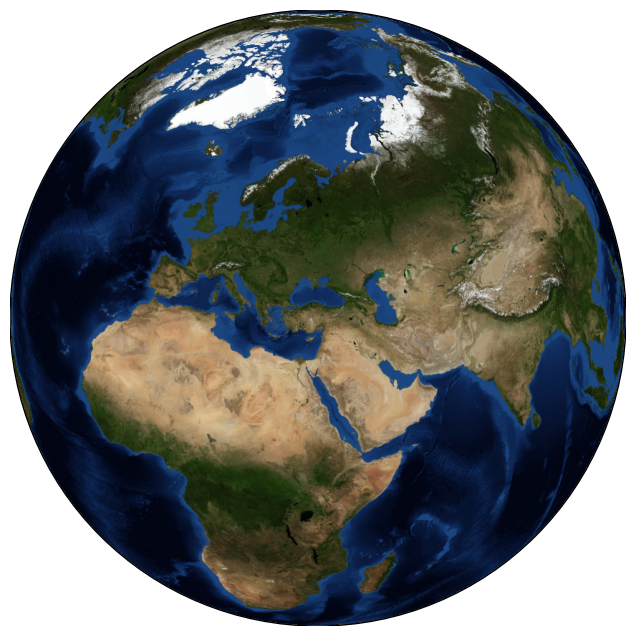

In [5]:
# Harita oluşturma
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=39.0, lon_0=35.0)
m.bluemarble(scale=0.5)

# Haritayı gösterme
plt.show()

In [10]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

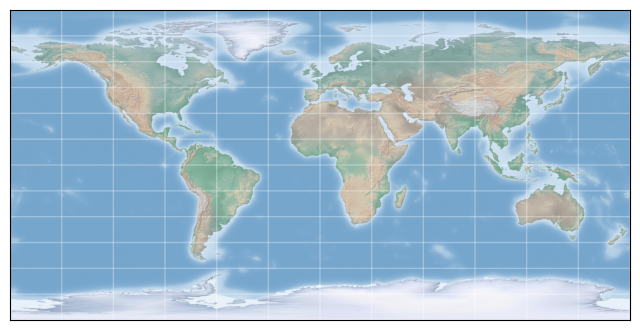

In [11]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

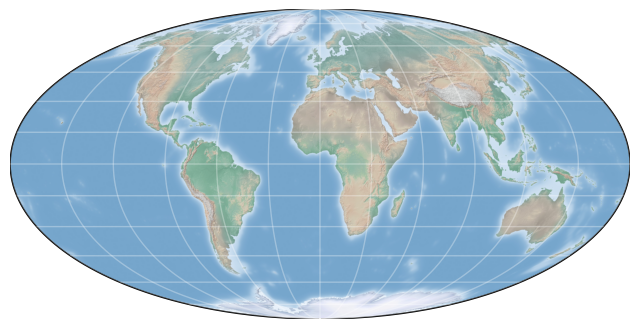

In [12]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

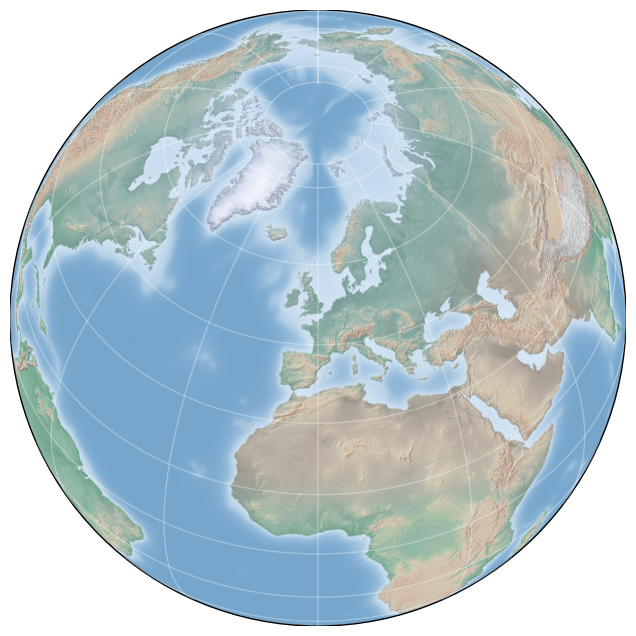

In [13]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

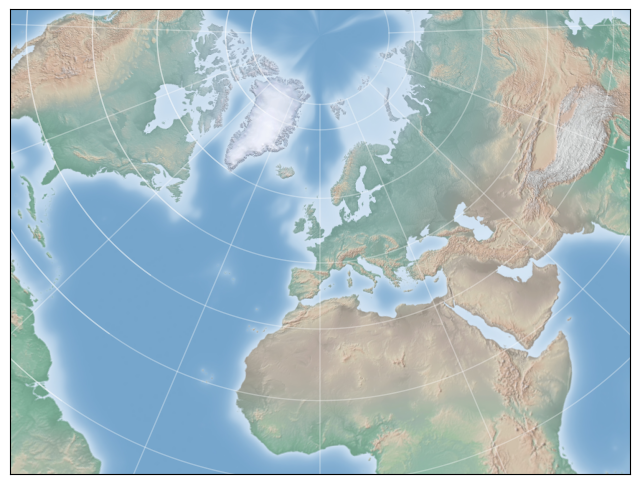

In [14]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


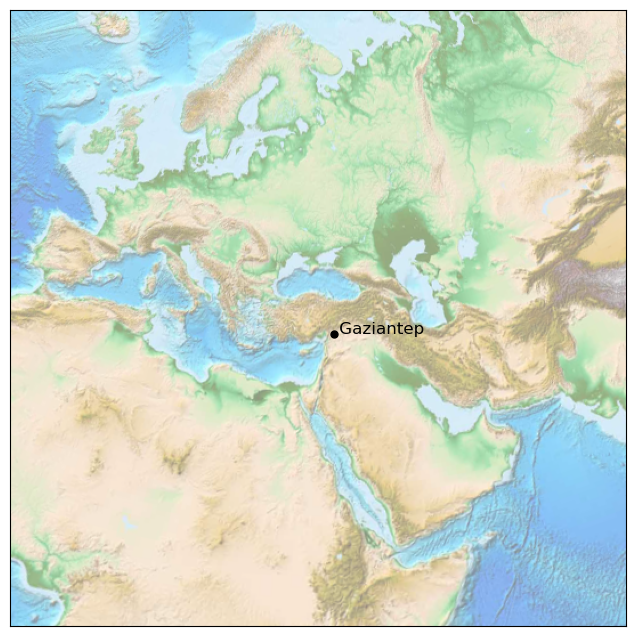

In [9]:
# Harita oluşturma
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='i',  # Orta çözünürlükte
            width=8E6, height=8E6, 
            lat_0=39.0, lon_0=35.0)
m.etopo(scale=0.5, alpha=0.5)

# Harita üzerinde Gaziantep'in koordinatları
gaziantep_lon, gaziantep_lat = 37.3833, 37.0662
x, y = m(gaziantep_lon, gaziantep_lat)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Gaziantep', fontsize=12)

# Haritayı gösterme
plt.show()

In [21]:
# Gaziantep koordinatları
gaziantep_lon, gaziantep_lat = 37.3833, 37.0662

In [27]:
# Nüfus ve alan örnek verileri (rastgele)
population = np.array([500000, 700000, 900000, 1000000])
area = np.array([100, 300, 500, 700])
lon = np.array([37.0, 38.0, 36.5, 37.5])
lat = np.array([37.0, 36.8, 37.2, 37.1])

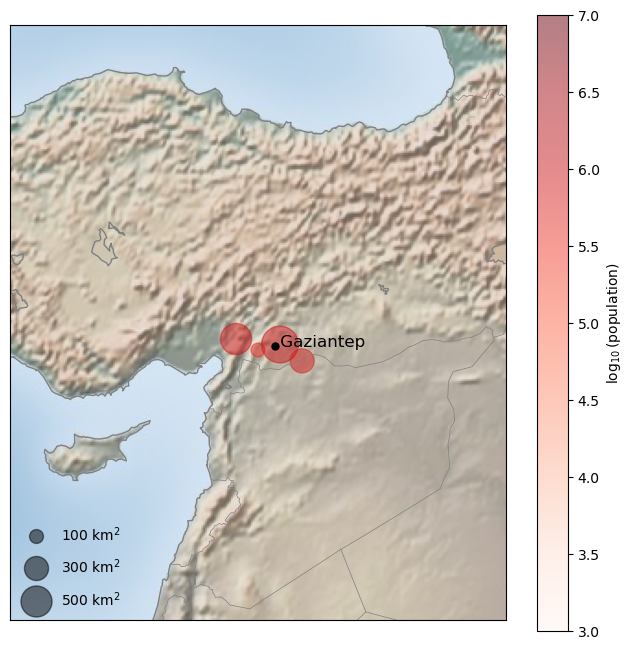

In [28]:
# Harita oluşturma
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=37.0,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Şehir verilerini haritaya işaretleme
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# Colorbar ve legend oluşturma
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# Legend için dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')

# Harita üzerinde Gaziantep'i işaretleme
x, y = m(gaziantep_lon, gaziantep_lat)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Gaziantep', fontsize=12)

# Haritayı gösterme
plt.show()